In [1]:
%load_ext autoreload
%autoreload 2

In [291]:
from deepshape.common import * 
from deepshape.curves import *
import torch
import torch.optim as optim

c2 = HalfCircle()
c1 = Circle()

a = SRVT(c1)
r = SRVT(c2)

RN = CurveReparametrizer([
    SineSeries(10) for i in range(15)
])

# Define loss function
loss_func = CurveDistance(q, r, k=2048)


# Choose and configure optimizer.
optimizer = optim.LBFGS(RN.parameters(), lr=1, max_iter=100, line_search_fn='strong_wolfe')
scheduler = None

error = reparametrize(RN, loss_func, optimizer, 300, Logger(1), scheduler=scheduler)

for p in RN.parameters():
    p.requires_grad = False
    
rafter = r.compose(RN)

x, z, _, _, _ = get_plot_data(q, r, RN, 1024)



[Iter     1] loss: 9.425828
[Iter     2] loss: 4.679338
[Iter     3] loss: 3.821980
[Iter     4] loss: 3.245014
[Iter     5] loss: 2.834454
[Iter     6] loss: 2.768835
[Iter     7] loss: 2.699609
[Iter     8] loss: 2.662085
[Iter     9] loss: 2.606266
[Iter    10] loss: 2.596795
[Iter    11] loss: 2.584156
[Iter    12] loss: 2.580446
[Iter    13] loss: 2.576309
[Iter    14] loss: 2.573750
[Iter    15] loss: 2.572959
[Iter    16] loss: 2.572849
[Iter    17] loss: 2.572620
[Iter    18] loss: 2.572479
[Iter    19] loss: 2.572164
[Iter    20] loss: 2.572105
[Iter    21] loss: 2.572075
[Iter    22] loss: 2.572072
[Iter    23] loss: 2.572066
[Iter    24] loss: 2.572056
[Iter    25] loss: 2.572051
[Iter    26] loss: 2.572051

Finished training in 0.55615s


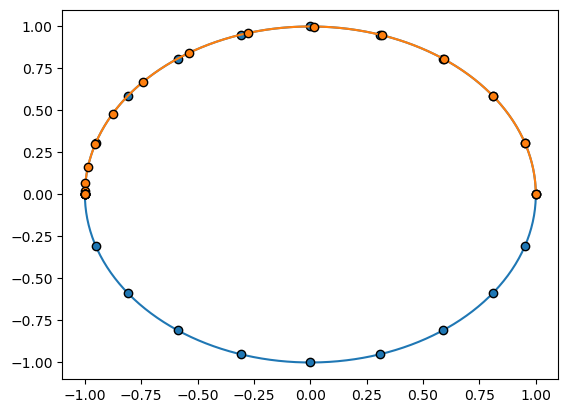

In [292]:
with torch.no_grad():
    fig, ax = plt.subplots()
    plot_curve(c1, ax=ax, npoints=500, dotpoints=21)
    plot_curve(lambda x: c2(RN(x)), npoints=600, ax=ax, dotpoints=21)
    plt.show()

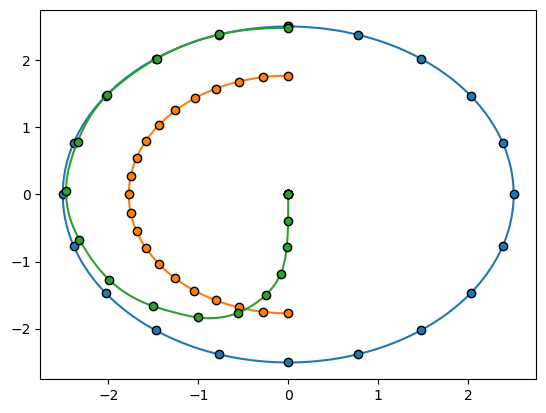

In [293]:
with torch.no_grad():
    fig, ax = plt.subplots()
    plot_curve(q, ax=ax, npoints=500, dotpoints=21)
    plot_curve(r, ax=ax, npoints=500, dotpoints=21)

    plot_curve(rafter, npoints=600, ax=ax, dotpoints=21)
    plt.show()

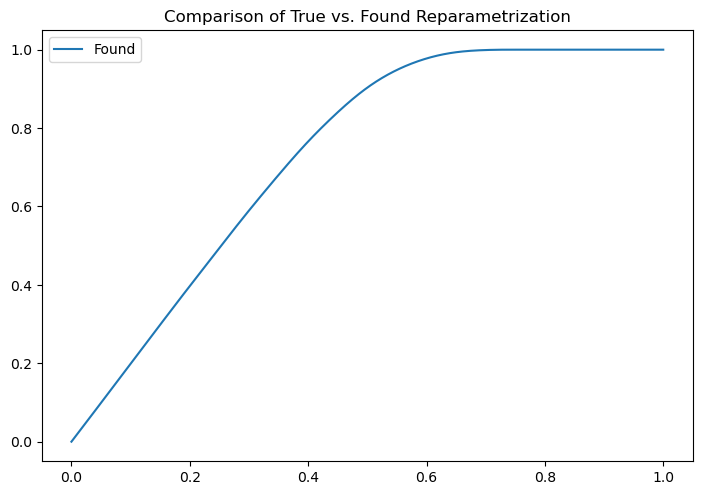

In [294]:
x, z, _, _, _ = get_plot_data(q, r, RN, 1024)

# Plot Diffeomorphism...
plt.figure(figsize=(8.4, 5.6))
plt.plot(x, z, label="Found", lw=1.5)
plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()
plt.show()

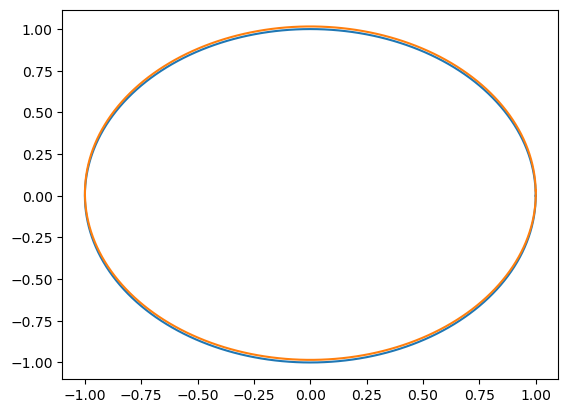

In [295]:
fig, ax = plt.subplots()
plot_curve(c1, ax=ax)
plot_curve(lambda x: q.inverse(x) + start, ax=ax)
plt.show()

In [304]:
import matplotlib.pylab as pl

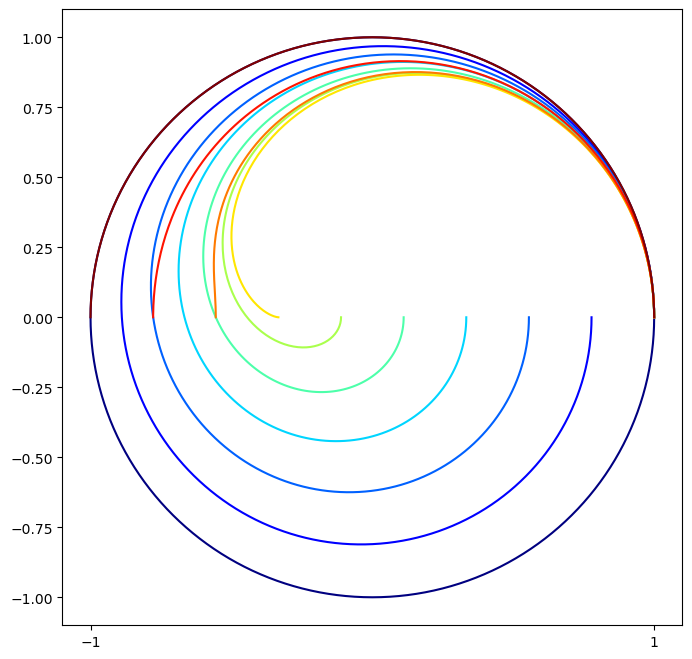

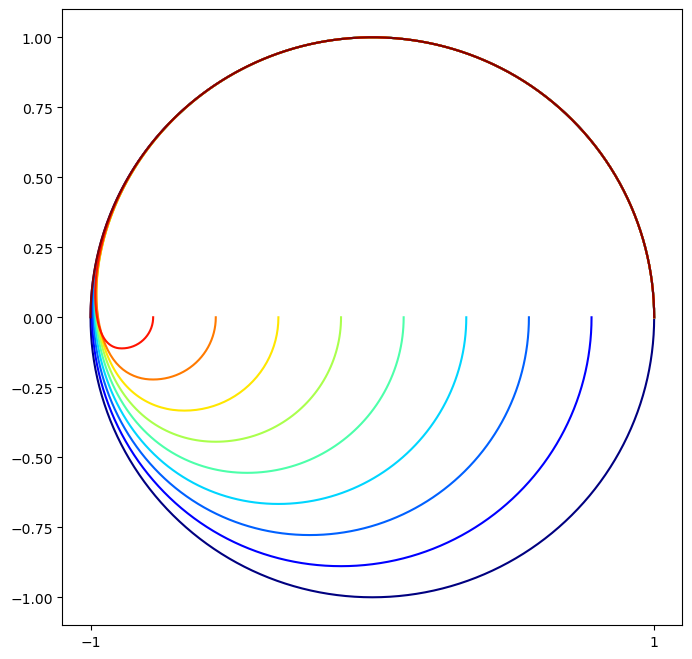

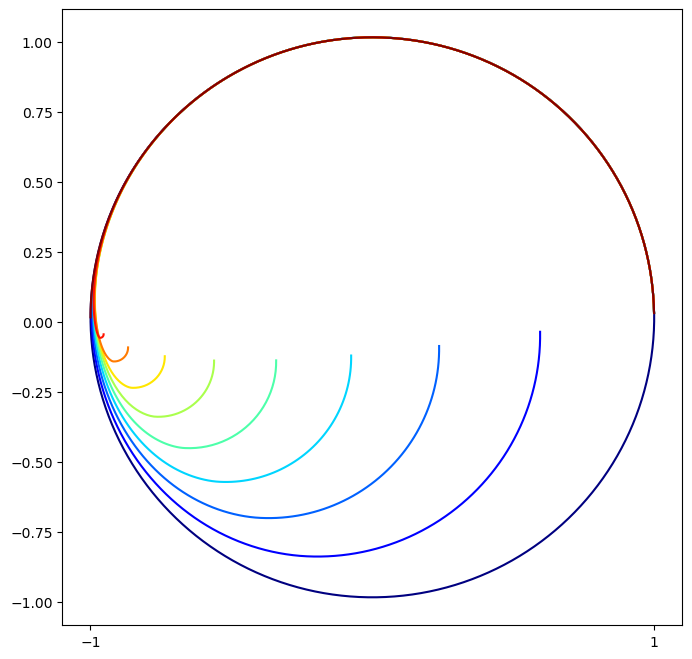

In [315]:
numsteps = 10
def inverse_srvt(q):
    def inv(x):
        Q = q(x)
        h = 1. / (x.shape[0] - 1)
        points = Q * Q.norm(dim=-1, keepdim=True)
        return h * points.cumsum(dim=0)
    return inv

def srvt_interpolate(q, r, t):
    new_q = interpolate(q, r, t)
    return inverse_srvt(new_q)

curves = linear_interpolate(c1, c2, steps=numsteps)
curves_after = linear_interpolate(c1, c2.compose(RN), steps=numsteps)
srvts = geodesics(q, rafter, steps=numsteps)


colors = pl.cm.jet(np.linspace(0,1,numsteps))

fig, ax = plt.subplots(figsize=(8, 8))
[plot_curve(ci, ax=ax, color=colori) for ci, colori in zip(curves, colors)]
ax.set_xticks([-1, 1])
plt.savefig("../figures/curve-interpolation/linear.pdf")

fig, ax = plt.subplots(figsize=(8, 8))
[plot_curve(ci, ax=ax,color=colori) for ci, colori in zip(curves_after, colors)]
ax.set_xticks([-1, 1])
plt.savefig("../figures/curve-interpolation/reparametrized_linear.pdf")

fig, ax = plt.subplots(figsize=(8, 8))
[plot_curve(lambda x: ci(x) + start, ax=ax,color=colori) for ci, colori in zip(srvts, colors)]
ax.set_xticks([-1, 1])
plt.savefig("../figures/curve-interpolation/geodesic.pdf")
plt.show()